In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
steam_df = pd.read_csv("steam_cleaned.csv")
steam_df.head(2)

,Unnamed: 0,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,...,Genres_Strategy,Genres_RPG,Genres_Free_to_play,Genres_Sports,Tags_Untagged,Tags_2D,Tags_Puzzle,Tags_Atmospheric,Tags_3D,Tags_Early_Access
0,0,0,0,19.99,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0.99,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
X = steam_df.drop(columns=['DEOM'])
y = steam_df['DEOM']

The dataset is to be split to training (80%) and test (20%) sets.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

Baseline models:

As this project tackles the task of estimating numeric target variable DEOM, baselines are set with models Linear regression, Ridge regression and Lasso regression.

In [112]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns

In [113]:
pipeline_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LinearRegression())
])

pipeline_ridge = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ridge', Ridge(alpha=0.5))
])

pipeline_lasso = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lasso', Lasso(alpha=0.5))
])

pipeline_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestRegressor(random_state=4))
])

pipeline_gbr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('gbr', GradientBoostingRegressor(random_state=4))
])

pipeline_lgbm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lgbm', LGBMRegressor(random_state=4,verbose=0))
])

pipeline_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBRegressor(random_state=4))
])

pipeline_cb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('cb', CatBoostRegressor(random_state=4, verbose=0))
])


Evaluation metrics:

Due to nature of the problem this project aims to solve, metrics such as R2, Mean squared error (MSE), Mean absolute percentage error (MAPE) are selected and will be evaluated on.

In [114]:
def train_and_evaluate(pipeline, X_train, y_train, X_test, y_test, model_name):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(model_name,  " Results:")
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))
    print()

Evaluation results of baseline models without any hyperparameter tuning:

In [115]:
train_and_evaluate(pipeline_lr, X_train, y_train, X_test, y_test, "Linear Regression")
train_and_evaluate(pipeline_ridge, X_train, y_train, X_test, y_test, "Ridge Regression")
train_and_evaluate(pipeline_lasso, X_train, y_train, X_test, y_test, "Lasso Regression")
train_and_evaluate(pipeline_rf, X_train, y_train, X_test, y_test, "Random Forest")
train_and_evaluate(pipeline_gbr, X_train, y_train, X_test, y_test, "Gradient Boosting")
train_and_evaluate(pipeline_lgbm, X_train, y_train, X_test, y_test, "LightGBM")
train_and_evaluate(pipeline_xgb, X_train, y_train, X_test, y_test, "XGBoost")
train_and_evaluate(pipeline_cb, X_train, y_train, X_test, y_test, "CatBoost")

Linear Regression  Results:
R2 Score:  0.4533532639982124
MSE:  3.973290175868051
MAPE:  2224037246444665.0

Ridge Regression  Results:
R2 Score:  0.4528347280899422
MSE:  3.9770591430903455
MAPE:  2224352682748203.8

Lasso Regression  Results:
R2 Score:  0.23930129905784847
MSE:  5.529122331097493
MAPE:  3400210687031903.0

Random Forest  Results:
R2 Score:  0.703896586511147
MSE:  2.1522213641323344
MAPE:  1126802972545379.8

Gradient Boosting  Results:
R2 Score:  0.7179980961246608
MSE:  2.0497248413833167
MAPE:  1266671012209446.8

LightGBM  Results:
R2 Score:  0.7347416744310504
MSE:  1.9280244985252593
MAPE:  1169475539571084.2

XGBoost  Results:
R2 Score:  0.7319531125435668
MSE:  1.9482931013040428
MAPE:  1172203001191243.2

CatBoost  Results:
R2 Score:  0.7365766265087625
MSE:  1.9146871883697332
MAPE:  1170010094596220.5



In [116]:
def cross_validate_pipeline(pipeline, X, y, model_name):
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(model_name, " Mean R2 Score: ", scores.mean() )
    print(model_name, " Std R2 Score: ", scores.std() )
    print()

In [117]:
cross_validate_pipeline(pipeline_lr, X_train, y_train, "Linear Regression")
cross_validate_pipeline(pipeline_ridge, X_train, y_train, "Ridge Regression")
cross_validate_pipeline(pipeline_lasso, X_train, y_train, "Lasso Regression")

Linear Regression  Mean R2 Score:  0.44182941679096943
Linear Regression  Std R2 Score:  0.013507810263327048

Ridge Regression  Mean R2 Score:  0.4440455639295256
Ridge Regression  Std R2 Score:  0.009491217880078668

Lasso Regression  Mean R2 Score:  0.23977117931298847
Lasso Regression  Std R2 Score:  0.002190121216683722



In [118]:
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, None]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best CV R2 Score for Random Forest:", grid_rf.best_score_)

Best Random Forest Parameters: {'rf__max_depth': 10, 'rf__n_estimators': 300}
Best CV R2 Score for Random Forest: 0.7278954315319115


In [119]:
param_grid_gb = {
        "gbr__n_estimators": [100, 200],
        "gbr__learning_rate": [0.01, 0.1, 0.2],
        "gbr__max_depth": [3, 5, 7]
}

grid_gb = GridSearchCV(pipeline_gbr, param_grid_gb, cv=5, scoring='r2')
grid_gb.fit(X_train, y_train)

print("Best Gradient Boosting Parameters:", grid_gb.best_params_)
print("Best CV R2 Score for Gradient Boosting:", grid_gb.best_score_)

Best Gradient Boosting Parameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__n_estimators': 200}
Best CV R2 Score for Gradient Boosting: 0.7337954767368561


In [120]:
param_grid_lgbm = {
        "lgbm__num_leaves": [30, 50],
        "lgbm__learning_rate": [0.01, 0.1]
}

grid_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=5, scoring='r2')
grid_lgbm.fit(X_train, y_train)

print("Best LightGBM Parameters:", grid_lgbm.best_params_)
print("Best CV R2 Score for LightGBM:", grid_lgbm.best_score_)

Best LightGBM Parameters: {'lgbm__learning_rate': 0.1, 'lgbm__num_leaves': 30}
Best CV R2 Score for LightGBM: 0.7343831243227288


In [121]:
param_grid_xgb = {
        "xgb__n_estimators": [100, 200],
        "xgb__learning_rate": [0.01, 0.1],
        "xgb__max_depth": [3, 5],
}

grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='r2')
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best CV R2 Score for XGBoost:", grid_xgb.best_score_)

Best XGBoost Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}
Best CV R2 Score for XGBoost: 0.7334443685777712


In [122]:
param_grid_cb =  {
        "cb__iterations": [30, 50, 100],
        "cb__learning_rate": [0.01, 0.05, 0.1],
        "cb__depth": [6,8,10]
}

grid_cb = GridSearchCV(pipeline_cb, param_grid_cb, cv=5, scoring='r2')
grid_cb.fit(X_train, y_train)

print("Best CatBoost Regressor Parameters:", grid_cb.best_params_)
print("Best CV R2 Score for CatBoost Regressor:", grid_cb.best_score_)

Best CatBoost Regressor Parameters: {'cb__depth': 10, 'cb__iterations': 100, 'cb__learning_rate': 0.1}
Best CV R2 Score for CatBoost Regressor: 0.7301225377263132


In [123]:
best_model = grid_lgbm.best_estimator_ 
y_pred_best = best_model.predict(X_test)

print("Final Model Results:")
print("R2 Score: ", r2_score(y_test, y_pred_best))
print("MSE: ", mean_squared_error(y_test, y_pred_best))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_best))

Final Model Results:
R2 Score:  0.7350986482283904
MSE:  1.9254298420705491
MAPE:  1164875574652239.2


Feature importances according to our selected model:

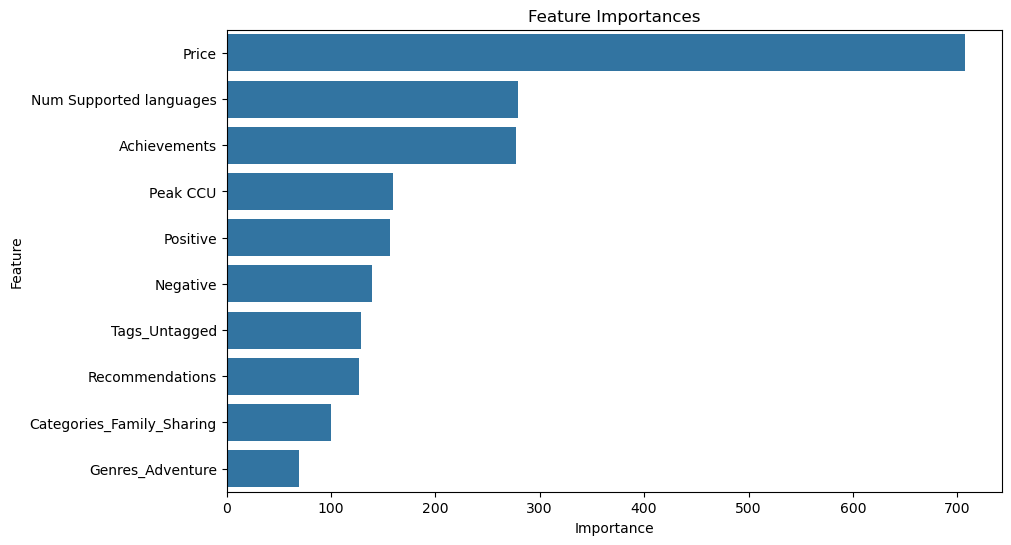

In [125]:
importances = best_model.named_steps['lgbm'].feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Feature Importances')
plt.show()